In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
np.random.seed(0) #For reproducibility

In [70]:
#Dogs: Higher ear flappiness, Lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [71]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [72]:
#Cats: Higher whisker length, Lower Ear flappiness index
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

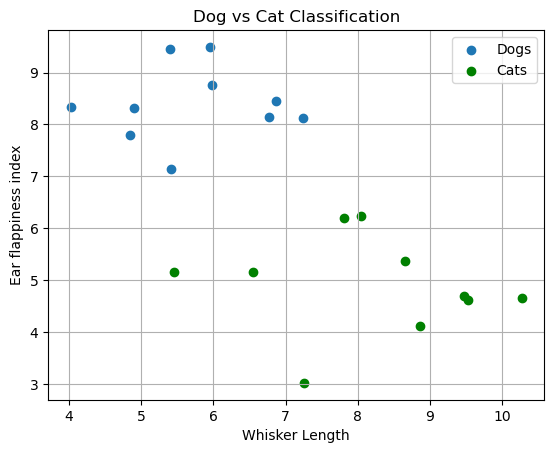

In [73]:
#Let's plot the data now
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats', color='green')
plt.xlabel('Whisker Length')
plt.ylabel('Ear flappiness index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.grid()
plt.show()

**NOW, IMPLEMENTING THE RANDOM LINEAR CLASSIFIER**

In [74]:
def random_linear_classifier(data_dogs, data_cats, k, d): #d is the number of features/dimentions
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0

In [75]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [76]:
#Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [77]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [78]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [79]:
#Run the random linear classifier algorithm
k = 100 #Number of linear classifier
d = 2 #Number of features
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)

In [80]:
best_theta

array([-1.07075262,  1.05445173])

In [81]:
best_theta0

-0.40317694697317963

In [82]:
#Plot the decision boundary now
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

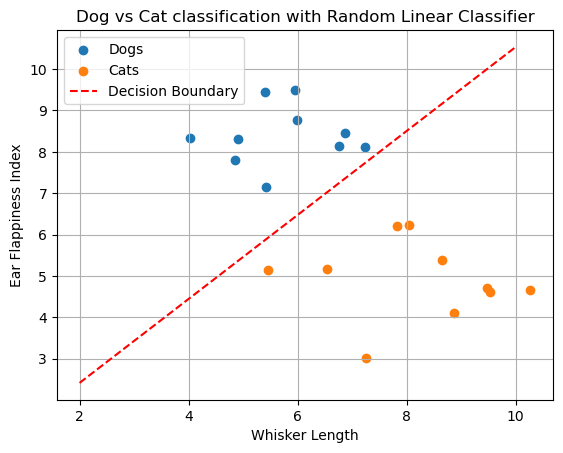

In [83]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat classification with Random Linear Classifier')
plt.legend()
plt.grid()
plt.show()

In [84]:
#Prepare labels and train-test split
from sklearn.model_selection import train_test_split

# Add labels (Dogs = +1, Cats = -1)
dogs_labels = np.full(dogs_data.shape[0], +1)
cats_labels = np.full(cats_data.shape[0], -1)

X = np.vstack((dogs_data, cats_data))
y = np.concatenate((dogs_labels, cats_labels))

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Separate dogs and cats for training data
dogs_train = X_train[y_train == +1]
cats_train = X_train[y_train == -1]


In [91]:
#Train classifier on training data
k = 100  # Number of random classifiers
d = 2    # Number of features
best_theta, best_theta0 = random_linear_classifier(dogs_train, cats_train, k, d)

# Compute errors
train_error = compute_error(dogs_train, cats_train, best_theta, best_theta0)

dogs_test = X_test[y_test == +1]
cats_test = X_test[y_test == -1]
test_error = compute_error(dogs_test, cats_test, best_theta, best_theta0)

print("Training Error:", train_error, "/", len(X_train))
print("Testing Error:", test_error, "/", len(X_test))


Training Error: 0 / 16
Testing Error: 0 / 4


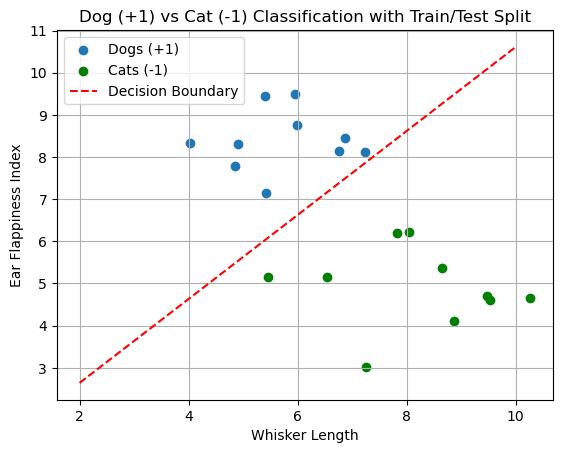

In [92]:
# Cell 3: Plot decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs (+1)')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats (-1)', color='green')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog (+1) vs Cat (-1) Classification with Train/Test Split')
plt.legend()
plt.grid()
plt.show()


In [95]:
#Testing
# Define prediction function
def predict(x, theta, theta0):
    """Predict label for a single data point x."""
    return 1 if np.dot(theta, x) + theta0 > 0 else -1
# Example unseen data points (Whisker Length, Ear Flappiness Index)
new_points = np.array([
    [6.0, 7.5],  # should look more like a Dog
    [8.5, 5.0],  # should look more like a Cat
    [5.2, 8.1],  # Dog region
    [7.9, 4.8],   # Cat region
    [3.6, 10.10]  #Dog
])

for point in new_points:
    label = predict(point, best_theta, best_theta0)
    species = "Dog (+1)" if label == 1 else "Cat (-1)"
    print(f"Point {point} --> Predicted: {species}")


Point [6.  7.5] --> Predicted: Dog (+1)
Point [8.5 5. ] --> Predicted: Cat (-1)
Point [5.2 8.1] --> Predicted: Dog (+1)
Point [7.9 4.8] --> Predicted: Cat (-1)
Point [ 3.6 10.1] --> Predicted: Dog (+1)


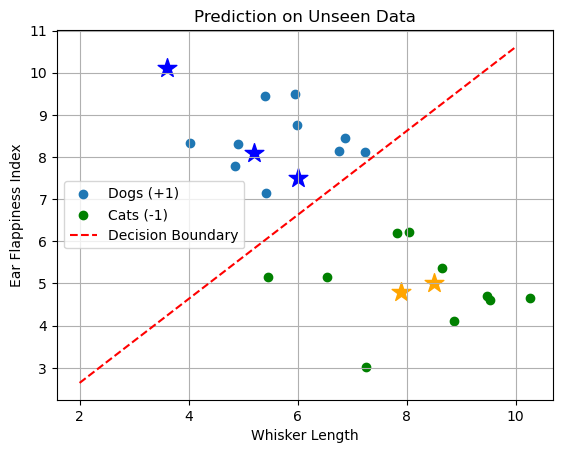

In [96]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs (+1)')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats (-1)', color='green')

# Plot decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')

# Plot new unseen points
for point in new_points:
    label = predict(point, best_theta, best_theta0)
    color = 'blue' if label == 1 else 'orange'
    plt.scatter(point[0], point[1], marker='*', s=200, color=color)

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Prediction on Unseen Data')
plt.legend()
plt.grid()
plt.show()
